<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

更新履歴：  
2023/10/20:  
* Google Colabへのデータファイルのアップロード方法を別途指示  

2023/10/15:
* 最小二乗法の関数をleast_squaresに変更
* 軸タイトルに日本語を表示する!pip install japanize-matplotlib 中止(都度実行する必要があるので)  

## 回帰  
例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("cost(x)")
plt.ylabel("sales(y)")
plt.scatter(x, y)

### 線形回帰モデル(単回帰分析)

$y = ax + b$ のaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

p = []
p.append(float(input('a= ')))  # 最初は2あたりから試す
p.append(float(input('b= ')))  # 最初は800あたりから試す

ylin = [estimate_func(p,i) for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

scipyライブラリを使って最小二乗法を実行してみる．



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 多項式回帰モデル(単回帰分析)

$y = ax^2 + bx + c$ のaとbとcを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

p = []
p.append(float(input('a= ')))  # 最初は0.03あたりから試す
p.append(float(input('b= ')))  # 最初は0.2あたりから試す
p.append(float(input('c= ')))  # 最初は700あたりから試す

ylin = [estimate_func(p,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

これもscipyライブラリを使って最小二乗法を実行してみる．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0.03, 0.2, 700]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
print('a={:.5},b={:.5},c={:.5}'.format(a,b,c))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する (J = result.cost*len(x)でも直接計算可能)
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

**よっしゃ！6次関数にしてみよう！**  
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

あんまり変わらない…

## 分類  
例題：ある昆虫のホルモン成分AとBの含有量から，雄と雌を分類する


### まずデータを可視化する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
#axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 一次直線で分類してみる

$y = ax + b$ のaとbを変えて，緑の線で性別(赤と青の点)を分けてみよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

a = float(input('a= '))  # 最初は1.8あたりから試す
b = float(input('b= '))  # 最初は-100あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

residual = [p - q for p, q in zip(y, ylin)]

# 間違いのカウント
nerror = 0
for i in range(len(x)):
    if t[i]*residual[i]>0:
        nerror += 1
print('{}個が誤り'.format(nerror))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="g")
fig.tight_layout()  # レイアウトの設定
plt.show()

＜より複雑な分類に関する参考文献＞  
https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification


# 3.3 機械学習の基礎と展望(後半：損失，過学習…)

## 損失関数

二乗損失関数を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$1,4,8$であった．各々のモデルの二乗損失を求めよ．  
二乗損失関数は東大のスライドの通りとする．  
$l(f_w(x),y)=0.5(y-f_w(x))^2$

In [ ]:
# 検算
y = 3
fw = float(input('fw(x)=)'))
print(0.5*(y-fw)**2)

モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が小さいか考えよ．

ロジスティック損失を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$-1,4,8$であった．各々のモデルのロジスティック損失を求めよ．  
損失関数は東大のスライドの通りとする．$log$は自然対数．  
$l(f_w(x),y)=log(1+exp(-yf_w(x)))$

In [ ]:
# 検算
import math as m
y = 3
fw = float(input('fw(x)=)'))
print(m.log(1+m.exp(-y*fw)))

計算結果の「e-n」は$10^{-n}$の意味である．  
例：3.1415e-7 → $3.1415×10^{-7}$

モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が大きいか考えよ．実際の値と予測値の符号の違いにも注意する．

#### コラム：予測と正解の差を表す名称  
* 損失関数 (loss function)  
* 誤差関数 (error function)  
* コスト関数 (cost function)  
* 目的関数 (objective function)  

ぶっちゃけ，最初はこれらは同じだと思って結構です．いずれも訓練時に用いられ，パラメータを変化させることによりモデルを向上させます．小さくなるほど「誤差」が少なく，良いモデルといえます．具体的な関数の名称(例えば平方根とか)ではないことに注意してください．  
  
これらとは別に「評価関数」(evaluation function)という言葉があります．損失関数らとは「いつ使うか」が異なります．訓練データではなく，実際のデータ(この後に取り扱う「検証データ」)を用いて，そのモデルの良し悪しを評価するときに使用します．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/machinelearning-func)  
  
なお，この章では東大のスライドの表現「損失関数」を使用します．

## 過学習

回帰モデルの「6次関数」    
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$  
訓練データが10個(もとは20個)だったら？

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# 10個に減らす
# xが広告費，yが売上高
x = [26,50,87,112,134,160,163,191,203,237]
y = [999,978,930,1161,1176,1203,1278,1488,1554,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

7個だったら？

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# 7個に減らす
# xが広告費，yが売上高
x = [26,87,112,134,160,163,237]
y = [999,930,1161,1176,1203,1278,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

元の訓練データ(青色の点)が７つしかないのに，6次関数という複雑なモデルを用いた場合，訓練に用いたデータにはよく適合します(Jの値はほぼ０)  
しかし「まだ知らない」データ(橙色の点)には適合しません．  
損失はちいさいですが，これは良い学習といえるのでしょうか？？  
これを**「過学習 (overfit)」**といいます．

逆にモデルを単純化する．  
$y = ax + 1000$という，パラメータが1個しかないモデルを試してみよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x+1000)

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あまりに単純すぎるモデルを使うと，たとえ訓練データが多くてもフィットしません．これが過学習の逆の**「アンダーフィット (underfit)」**という現象です．

## 汎化

訓練データ(学習データ)のみならず，すべてのデータによくフィットすることをモデルの「汎化(はんか)」という．先ほどの回帰モデルの例のように，あまりにも複雑なモデルは訓練データにはよくフィットする(訓練損失(経験損失，訓練誤差)が小さくなる)が，訓練に用いなかったデータ(未知のデータ)に対する損失(汎化損失)は増えてしまう．

## 正則化

LASSO回帰で用いられる$L_1$正則化を試してみる．  
二次の回帰モデルで，適当に係数a,b,cを入れてみる．  
係数の値によって正則化項が求まり，それに係数λを乗じ，損失に追加したものが**正則化付き**経験損失となる．  
$L_1$正則化では，正則化項は単純に係数a,b,cの絶対値の和である．  
損失とλから，手計算でも確認するとよい．  
係数が大きくなるとモデルが複雑になるが，正則化付き経験損失を用いて最小化すれば，モデルの複雑さをある程度抑えることができる．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

p = []
p.append(float(input('a= ')))  # 最初は0.03あたりから試す
p.append(float(input('b= ')))  # 最初は0.2あたりから試す
p.append(float(input('c= ')))  # 最初は700あたりから試す

ylin = [estimate_func(p,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
J /= len(x) # この節ではデータ数で割っています
print('損失={}'.format(J))
R = abs(p[0])+abs(p[1])+abs(p[2])
print('正則化項R={}'.format(R))
print('λ=10とすると')
print('正則化付き損失=訓練損失＋λ×正則化項=',format(J+10*R))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

## 検証データ (validation data)

実際にデータを「訓練データ」と「検証データ」に分けてみる．  
当然ながら，訓練誤差と検証誤差は異なる．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# xが広告費，yが売上高
#x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
#y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 訓練データ(青丸)
x = [35,60,87,100,112,117,134,145,160,163,173,215,237,270]
y = [933,960,930,1002,1161,1155,1176,1230,1284,1278,1497,1614,1779,1971]

# 検証データ(赤丸)
xval = [26,50,191,199,203,160]
yval =[999,978,1488,1569,1554,1203]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]
ylinval = [estimate_func(result.x,i) for i in xval]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
J /= len(x)
print('J/n(訓練データ)={}'.format(J))

J = 0
for i in range(len(xval)):
    J += (ylinval[i]-yval[i])**2
J /= len(x)
print('J/n(検証データ)={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y,color="b")
axe.scatter(xval,yval,color="r")
for i in range(len(xval)):
    axe.plot([xval[i],xval[i]],[yval[i],ylinval[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

### コラム：データの名称  
「○○データ」も「○○関数」と同じように，似た概念があったり，解説者によって流儀や誤解があり，混乱している．  
* 学習データ(訓練データ, トレーニングデータ，training data)  
…モデルの学習そのものに用いるデータ．過学習の例では青い点．  
* 検証データ(ホールドアウトデータ, validation data)  
…汎化誤差を評価し，ハイパーパラメーター(人間が調整して入力するパラメータ)を調整するためのデータ．  
* テストデータ (test data)  
…最終的に出来上がったモデルの性能を評価するために，別に用意されたデータ．機械学習の参考文献ではあまり登場しないが，本番環境で使い物になるかどうかの評価においては，学習データや検証データを用いるべきではない．  

なお，「教師データ」という言い方もあり，「学習データ」とほぼ同じ意味で使用されているが，「教師無し学習」で「教師データ」とはよばない．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/ml-basic-data)

## 正規化と標準化

正規化も標準化も，機械学習の前処理の一つであり，データの範囲を分かりやすい範囲(おおむね-1～1)にスケーリングする方法である．  
単に人に分かりやすいということだけでなく，実際にデータを正規化や標準化しないで学習させてもうまくいかない場合がある．  
  
なおこの「正規化」「標準化」も文献により混同されていて，たとえば正規化と標準化をひっくるめて正規化と呼んでいる場合もある．

### 正規化

最小値を0，最大値を1となるようにスケーリングする方法．  
$x_{new}=\dfrac{x-x_{min}}{x_{max}-x_{min}}$  
**「外れ値」に弱い**ので，最大値・最小値が既知の場合以外は使わないほうが良い．  

例題：最大値が56，最小値が24の場合に，32を正規化するとどうなるか？

### 標準化

平均値が0，分散が1となるようにスケーリングする方法．  
σは標準偏差とすると，データから平均を引き，標準偏差σで割ればよい．  
$x_{new}=\dfrac{x-x_{avg}}{σ}$  
  
ライブラリによって標準偏差だったり(scikit-learn, numpy)不偏標準偏差(不偏分散の平方根)だったりする(pandas, R)らしいが，データ数nが大きいので，機械学習の結果にはそう大きな影響はないと思われる．  
https://qiita.com/karaage0703/items/f38d18afc1569fcc0418

例題：標準偏差が16，平均が24の場合に，32を標準化するとどうなるか？また，16を標準化するとどうなるか？

## 例：タイタニックの生存分析

### 0)データの読み込みと前処理

ToyoNet-ACEから**titanic.csv**をダウンロードし，Google Colabにアップロードする．手順はToyoNet-ACEに書いてある．  

*Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic*

In [1]:
import pandas as pd
data_df=pd.read_csv("titanic.csv")
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


このデータは1912年のタイタニック号の事故の乗客データである．  
https://www.kaggle.com/competitions/titanic  
  
データ列は以下の通り：  
* PassangerID: 乗船者ID
* Survived: 生存情報(0=死亡，1=生存)
* Pclass: チケットのクラス(1=1st, 2=2nd , 3=3rd)
* Name / Sex / Age: 名前/ 性別/ 年齢
* SibSp / Parch: 乗船している兄弟・配偶者/ 親⼦の⼈数
* Ticket / Fare / Cabin : チケット番号/ 運賃/キャビン番号
* Embarked: 乗船場所(C = Cherbourg, Q = Queenstown, S = Southampton)  
  
ここで，**NaN**という表示があるのが分かるであろうか．これはデータがない，つまり**「欠損値」**を示している．実際のデータにはこのような欠損値や異常値がある場合がある．

データの基本的な統計量を確認する．  
describe()は，個数や平均などを表示する．

In [ ]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


前処理を行う．詳細はコード中のコメント文を見る．  
データ型は次の通り．  
* int64: 64bit符号付き整数(-9,223,372,036,854,775,808～9,223,372,036,854,775,807)
* float64: 64bit浮動小数点数
* unit8: 8bit符号なし整数(0～255)
* object: その他(主に文字列)

In [3]:
data_df=data_df.drop(["Cabin"],axis=1)             # Cabin列を消す
data_df=data_df.dropna(subset=["Age","Embarked"])  # AgeとEmbarkedが欠損している行を削除する
data_df=data_df.drop(["PassengerId","Name","Ticket"],axis=1)  # そのほか無関係な列を消去する
cat_col=['Sex','Pclass','Embarked']                # Sex, Pclass, Embarkedは文字列なので，数字に変換する
data_df=pd.get_dummies(data_df,columns=cat_col)
data_df.dtypes                                     # データ型を確認．すべて数字になっている

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

### 1)訓練データと検証データの分割

*東大のスライドではscikit-learnの定義に基づいて「訓練データ(train)」と「テストデータ(test)」という説明をしているが，ここでは3.3で学んだ通り「検証データ」という言葉を用いる．*

全体のデータ(712人分)の2割(2行目のtest_size=に書いているのがその割合)を検証データに，残りを訓練データに分割する．

In [4]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(data_df,test_size=0.2,random_state=0)
print('訓練データ数：{}，検証データ数：{}'.format(len(train_df),len(test_df)))

訓練データ数：569，検証データ数：143


### 2)データの標準化  
各列の平均を0，分散を1となるように標準化する．  
訓練データの平均と分散から定める．検証データについてもその値で標準化する

In [5]:
from sklearn.preprocessing import StandardScaler

X_train = train_df.iloc[:,1:].values
Y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values
Y_test = test_df.iloc[:,0].values

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
print(Y_test)

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


###3) ロジスティック回帰による分類

ロジスティック回帰(手法の詳細は個の講義では省略)を行って，乗客の生死を予測するモデルを作成する．  
訓練データによる分類精度と，検証データによる分類精度にそれほど違いがないことを確認する．もし検証データによる分類精度が訓練データによるものより大幅に低ければ，それは過学習が発生している可能性がある．

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

params={"C":np.logspace(0,4,5)}
logreg_cv=GridSearchCV(LogisticRegression(),cv=5,param_grid=params)
logreg_cv.fit(X_train,Y_train)
print('訓練データでの分類精度：{0:.2%}'.format(logreg_cv.score(X_train,Y_train)))
print('検証データでの分類精度：{0:.2%}'.format(logreg_cv.score(X_test,Y_test)))


訓練データでの分類精度：80.14%
検証データでの分類精度：81.82%


###4)混同行列

混同行列は，機械学習の性能を行列の形でまとめたもので，通常は次のように色付きの格子として表現する．縦が検証データの真の値，横が機械学習で得られた検証データの予測値である．ネットの情報では，縦と横が逆の場合も少なからず見受けられるので注意する．  

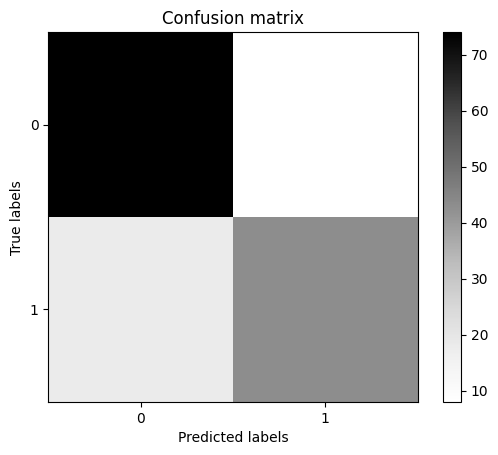

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test,logreg_cv.predict(X_test),labels=[0,1])

plt.xticks([0,1],[0,1])
plt.yticks([0,1,],[0,1])
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.imshow(cm,cmap=plt.cm.Greys)
plt.colorbar()

混同行列の見方を説明する．  
左上の黒いところは検証データの真の値が0(乗客が死亡)で予測値も0の場合，右下の灰色は検証データの真の値が1(乗客が生存)で予測値も1の場合である．どちらも正しい値である．  
一方で左下は検証データの真の値が1なのに予測値が0の場合，右上は検証データの真の値が0なのに予測値が1の場合で，どちらも誤りである．  
このように混同行列は，先ほどの「分類精度」だけを見るよりも学習の性能が詳しくわかる．

混同行列の中身を見てみる．先ほどの図と対応して表示される．

In [12]:
cm

array([[74,  8],
       [18, 43]])

## 教師なし学習

### クラスタリング

東大の資料の「リテラシーレベル教材」の「4-9. データ活用実践（教師なし学習）」の例を使う．  
  
「卸売業者の顧客データ」を分析する．  


#### 0) 下準備  
  
1. ToyoNet-ACEのこの講義のトップページを開く．  
2. **Wholesale customers data.csv**というファイルをダウンロードす
る．  
3. ToyooNet-ACEの**Google Colabへのファイルのアップロード方法.pdf**を参考に，そのファイルをGoogle Colabにアップロードする．
4. Google Colabの画面左側に**Wholesale customers data.csv**が表示されれば成功．  



#### 1)データの読み込みと前処理

データには以下の情報が含まれる．  
* Channel : 販売チャネル(1=Horeca (ホテル等), 2=個⼈向け⼩売)  
* Region : 各顧客の地域(1=リスボン市, 2=ポルト市, 3=その他)  
* Fresh : ⽣鮮品の年間⽀出額  
* Milk : 乳製品の年間⽀出額  
* Grocery : ⾷料雑貨の年間⽀出額  
* Frozen : 冷凍⾷品の年間⽀出額  
* Detergents_Paper : 衛⽣⽤品と紙類の年間⽀出額  
* Delicassen : 惣菜の年間⽀出額  
  
このうちChannelとRegionは使用しないので，後ほど消去する．  
ここでは最初の5件のデータしか表示していないが，全部で440件分ある．  

In [ ]:
import pandas as pd
data_df = pd.read_csv('Wholesale customers data.csv')
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.head(5)

欠損データのチェック…欠損データなし

In [ ]:
data_df.isnull().sum()

データのタイプを確認…すべて整数値

In [ ]:
data_df.dtypes

ChannelとRegionの列を削除

In [ ]:
cat_col = ['Channel','Region']
data_df = data_df.drop(cat_col,axis=1)

データの概要を見てみよう．  
* count データ数
* mean 平均
* std 標準偏差
* min 最小値
* 25% 第1四分位数
* 50% 中央値
* 75% 第2四分位数
* max 最大値

In [ ]:
data_df.describe()

#### 2)クラスター数の決定

ここからK-平均法 (K-means法)でクラスタリングを行うが，まず，クラスターの数を求める．これは予備的な処理（エルボー法）で人間の目視で(！)決めるしかない．  
  
クラスターの数は多ければ多いほどいいわけではなく，極端に言えばデータと同じ数のクラスターなら誤差は無いが，それはクラスターとはいえない．  
具体的にはクラスター数を増やしながら誤差平方和(SSE)を計算して，それ以上クラスターを増やしてもSSEが減らない（グラフ上でポキッと曲がっているところ）あたりで決めるらしい．

In [ ]:
X = data_df.values
from sklearn.cluster import KMeans
objective_vals = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)
    km = km.fit(X)
    objective_vals.append(km.inertia_)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, objective_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Objective values')
plt.title('Elbow Method K-Means')
plt.show()

SSE(グラフではObjective Values)の変化が，クラスター数5あたりから変わらなくなるので，5に決定．

#### 3)クラスタリング

改めてクラスターに分けてみる．各データにクラスターの番号(cluster)が割り振られる．

In [ ]:
pred = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0).fit_predict(X)
data_df_ = pd.read_csv('Wholesale customers data.csv').drop(cat_col,axis=1)
data_df_['cluster']=pred
data_df_.head(5)

クラスターごとに何個のデータがあるか．

In [ ]:
data_df_['cluster'].value_counts()

クラスターごとに平均値を見てみる．

In [ ]:
data_df_.groupby('cluster').mean()

平均値を積算棒グラフにしてみる．

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['cluster'+str(i)] = data_df_[data_df_['cluster'] ==i].mean()
clusterinfo = clusterinfo.drop('cluster')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(),rotation=0)

### 確率密度推定

KDE(Kernel Density Estimation)を用いて確率密度を推定する．  
  
https://qiita.com/bitchal/items/ad1747e9f640b5cb0214
より引用しました．

#### 1) 1次元データの確率密度推定

乱数を用いてデータを作成する．ここでは2つの異なる正規分布を有するランダムデータを重ね合わせる．  
縦軸はデータの個数の割合を示す．  
乱数なので，実行結果は実行するごとに異なる．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(200), norm(1, 0.3).rvs(100)])

# ヒストグラムで確認する
fig, ax = plt.subplots(figsize=(17, 4))
ax.hist(x, 10, fc='gray', histtype='stepfilled', alpha=0.5, density=True)
ax.set_xlim(x.min()-1, x.max()+1)
plt.show()

KDEで確率密度推定をおこなう．  
  
応用として，bandwidthを変えてみるとよい．大きくなるとスムーズになる．

In [ ]:
from sklearn.neighbors import KernelDensity
X = x.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X) # ←ここのbandwidth=0.2の0.2を別の値にしてみよう
kde.score_samples(X)
x_plot = np.linspace(-5, 5, 50)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17, 4))
ax.plot(x_plot, np.exp(kde.score_samples(x_plot)), linewidth=3, alpha=0.5)
ax.hist(X, 10, fc='gray', histtype='stepfilled', alpha=0.5, density=True)
ax.set_xlim(X.min()-1, X.max()+1)
plt.show()

もっと複雑な，3つの正規分布が合体したデータから推定してみよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
from sklearn.neighbors import KernelDensity

np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(200), norm(1, 0.3).rvs(100), norm(-4.5, 0.5).rvs(100)]) # ここで3つの正規分布を合体

# ヒストグラムで確認する
#fig, ax = plt.subplots(figsize=(17, 4))
#ax.hist(x, 10, fc='gray', histtype='stepfilled', alpha=0.5, density=True)
#ax.set_xlim(x.min()-1, x.max()+1)
#plt.show()

X = x.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)
x_plot = np.linspace(-5, 5, 50)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17, 4))
ax.plot(x_plot, np.exp(kde.score_samples(x_plot)), linewidth=3, alpha=0.5)
ax.hist(X, 10, fc='gray', histtype='stepfilled', alpha=0.5, density=True)
ax.set_xlim(X.min()-1, X.max()+1)
plt.show()

#### 2)2次元データの確率密度推定

これも2つの正規分布の合体である．

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.distributions import norm

np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(200), norm(1, 0.3).rvs(100)])
y = np.concatenate([norm(-1, 1.).rvs(200), norm(1, 0.3).rvs(100)])

# 2Dヒストグラムで確認する
import matplotlib.cm as cm
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

H = ax.hist2d(x, y, bins=60, density=True, cmap=cm.gray)
fig.colorbar(H[3],ax=ax)

plt.show()

同じくKDE法で推定する．bandwidthを変えてみるとよい．

In [ ]:
from sklearn.neighbors import KernelDensity
X = np.vstack((x, y)).T

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X) # ←ここのbandwidth=0.2の0.2を別の値にしてみよう
np.exp(kde.score_samples(X))
f0 = np.arange(x.min(), x.max(), 0.1)
f1 = np.arange(y.min(), y.max(), 0.1)
xx, yy = np.meshgrid(f0, f1)

positions = np.vstack([xx.ravel(), yy.ravel()]).T

scores = np.exp(kde.score_samples(positions)).T

f = np.reshape(scores, xx.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

cset = ax.contour(xx, yy, f, colors='r')
ax.clabel(cset, inline=1, fontsize=10)

H = ax.hist2d(x, y, bins=60, density=True, cmap=cm.gray)
fig.colorbar(H[3],ax=ax)

plt.show()
